In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
method_replacement_dict = {"difference": "Difference",
                           "initial": "Initial Parameters",
                           "late_em": "Late EM",
                           "pure_competency": "Pure Competency", 
                           "real_early": "Real early Param."}


def parameter_table_model(df, latent_dimension=2, item_dimension=20, aggfunc="median", caption="", decimals=3):
    sub_df = df[(df["latent_dimension"] == 2) & (df["item_dimension"] == 20)]
    n =np.min(sub_df.groupby(["latent_dimension", "item_dimension", "sample_size"])["method"].value_counts())
    rmse_columns = ["method", "sample_size", "rmse_early_A", "rmse_early_delta", "rmse_early_sigma",
                    "rmse_late_A", "rmse_late_delta", "rmse_late_sigma", "rmse_psi"]
    sub_df = sub_df[rmse_columns]
    columns = ["Method","Sample size", "$A^e$", "$\Delta^e$", "$\Sigma^e$",
                       "$A^l$", "$\Delta^l$", "$\Sigma^l$", "$\Psi$"]
    sub_df.columns = columns
    sub_df = sub_df.replace(method_replacement_dict)
    parameter_table = sub_df.groupby(["Sample size", "Method"]).agg(aggfunc)
    parameter_table = np.round(parameter_table, decimals)
    print(parameter_table.to_latex(bold_rows=True, multirow=True, 
                                   caption=caption+", n={0}".format(n), 
                                   position="H", escape=False))
    return(parameter_table)

In [3]:
def single_metric_table(df, metric, aggfunc="median", latex=True, decimals=3, caption=""):
    df = df.replace(method_replacement_dict)
    n = np.min(df.groupby(["latent_dimension", "item_dimension", "sample_size"])["method"].value_counts())
    table = pd.crosstab(index=[df["sample_size"], df["method"]],
                columns=[df["latent_dimension"], df["item_dimension"]], 
                values=df[metric], 
                aggfunc=aggfunc)
    table = np.round(table, decimals)
    if latex:
        print(table.to_latex(bold_rows=True, multirow=True, 
                             caption=caption+", n={0}".format(n),
                             position="H"))
    return(table)

In [4]:
def model_boxplot(df, metric='rmse_psi', latent_dimension=2, item_dimension=20, 
                  title="",
                  methods=["late_em", "real_early", "pure_competency", "initial", "difference"]):
    sub_df = df[(df["latent_dimension"] == 2) & (df["item_dimension"] == 20)]
    sub_df = sub_df[(sub_df["method"].isin(methods))]
    sub_df = sub_df.replace(method_replacement_dict)
    n =np.min(sub_df.groupby(["latent_dimension", "item_dimension", "sample_size"])["method"].value_counts())
    fig = plt.gcf()
    fig.set_dpi(100)
    fig.set_size_inches(10, 5)
    plt.title(title+", n={0}".format(n))
    sn.boxplot(x=sub_df[metric], hue=sub_df["sample_size"].astype("str"), y=sub_df["method"],
               orient="h")

# Results

## Simulatuion Results

### Full Q Matrix

In [5]:
full_Q_df = pd.read_csv("results/full_q.csv")
full_Q_df

,latent_dimension,item_dimension,sample_size,key,method,early_runtime,late_runtime,early_steps,late_steps,early_l_optimal,...,rmse_early_A,rmse_early_delta,rmse_early_sigma,rmse_late_A,rmse_late_delta,rmse_psi,rmse_late_sigma,rmse_theta,rmse_gain_estimated,rmse_gain_pred_train
0,2,10,30,2022-11-11 16:06:54.090963,late_em,3.01,29.04,11.0,16.0,-174.92,...,2.318667,1.226451,0.106137,12.650931,6.347811,0.233657,0.174027,0.684082,0.707607,0.974814
1,2,10,30,2022-11-11 16:06:54.090963,initial,0.00,0.00,0.0,0.0,-175.06,...,0.803867,0.651136,0.030688,2.405452,1.532099,0.301606,0.535876,0.616656,0.698056,0.979756
2,2,10,30,2022-11-11 16:06:54.090963,difference,2.16,6.72,8.0,20.0,-175.40,...,1.400578,0.891573,0.073468,7.565683,3.225372,0.415483,0.318510,0.682545,0.840586,1.029125
3,2,10,30,2022-11-11 16:06:54.090963,real_early,NaN,21.14,NaN,12.0,NaN,...,NaN,NaN,NaN,8.351633,6.842718,0.182268,0.163250,0.000000,0.679892,0.888402
4,3,10,30,2022-11-11 16:07:58.663076,late_em,2.85,145.65,9.0,24.0,-166.24,...,2.104952,1.114418,0.153674,21.877352,14.181222,0.365256,0.425353,0.598126,0.855704,1.002520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3,10,30,2022-11-11 19:29:06.618080,real_early,NaN,38.99,NaN,11.0,NaN,...,NaN,NaN,NaN,1.410371,2.383224,0.336275,0.311308,0.000000,0.982679,1.233907
204,2,20,30,2022-11-11 19:31:01.735765,late_em,4.06,25.59,7.0,10.0,-303.36,...,1.293881,1.736140,0.365291,2.865404,4.059049,0.386921,0.296811,0.462044,0.765471,1.071534
205,2,20,30,2022-11-11 19:31:01.735765,initial,0.00,0.00,0.0,0.0,-303.74,...,1.835549,0.671359,0.353553,1.327319,1.517050,0.179475,0.212132,0.525830,0.852259,1.019509
206,2,20,30,2022-11-11 19:31:01.735765,difference,4.87,5.85,8.0,10.0,-302.85,...,1.316712,1.991995,0.365009,4.125109,3.247249,0.266551,0.158521,0.458031,0.945668,1.163729


In [6]:
parameter_table_model(full_Q_df)

\begin{table}[H]
\centering
\caption{, n=4}
\begin{tabular}{llrrrrrrr}
\toprule
    &                   &  $A^e$ &  $\Delta^e$ &  $\Sigma^e$ &   $A^l$ &  $\Delta^l$ &  $\Sigma^l$ &  $\Psi$ \\
\textbf{Sample size} & \textbf{Method} &        &             &             &         &             &             &         \\
\midrule
\multirow{4}{*}{\textbf{30 }} & \textbf{Difference} &  1.433 &       1.678 &       0.146 &   7.320 &       5.876 &       0.186 &   0.279 \\
    & \textbf{Initial Parameters} &  1.765 &       0.652 &       0.129 &   1.397 &       1.763 &       0.561 &   0.315 \\
    & \textbf{Late EM} &  1.503 &       1.615 &       0.150 &  15.213 &       7.017 &       0.272 &   0.393 \\
    & \textbf{Real early Param.} &    NaN &         NaN &         NaN &  13.161 &       9.867 &       0.258 &   0.352 \\
\cline{1-9}
\multirow{4}{*}{\textbf{100}} & \textbf{Difference} &  0.650 &       0.425 &       0.151 &   0.783 &       1.038 &       0.109 &   0.212 \\
    & \textbf{Initial Para

/tmp/ipykernel_39095/150259998.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(parameter_table.to_latex(bold_rows=True, multirow=True,


$A^e$  $\Delta^e$  $\Sigma^e$   $A^l$  \
Sample size Method                                                      
30          Difference          1.433       1.678       0.146   7.320   
            Initial Parameters  1.765       0.652       0.129   1.397   
            Late EM             1.503       1.615       0.150  15.213   
            Real early Param.     NaN         NaN         NaN  13.161   
100         Difference          0.650       0.425       0.151   0.783   
            Initial Parameters  1.352       0.514       0.190   1.307   
            Late EM             0.645       0.422       0.168   1.030   
            Real early Param.     NaN         NaN         NaN   1.108   
200         Difference          0.465       0.279       0.099   0.527   
            Initial Parameters  1.298       0.529       0.087   1.477   
            Late EM             0.520       0.298       0.110   0.680   
            Real early Param.     NaN         NaN         NaN   0.548   

                                $\Delta^l$  $\Sigma^l$  $\Psi$  
Sample size Method                                              
30          Difference               5.876       0.186   0.279  
            Initial Parameters       1.763       0.561   0.315  
            Late EM                  7.017       0.272   0.393  
            Real early Param.        9.867       0.258   0.352  
100         Difference               1.038       0.109   0.212  
            Initial Parameters       1.627       0.395   0.283  
            Late EM                  1.486       0.194   0.426  
            Real early Param.        1.169       0.146   0.432  
200         Difference               0.608       0.121   0.170  
            Initial Parameters       1.631       0.256   0.308  
            Late EM                  1.424       0.459   0.331  
            Real early Param.        1.002       0.399   0.341

In [7]:
single_metric_table(full_Q_df, "rmse_psi", caption="RMSE for Correlations $\Psi$")

\begin{table}[H]
\centering
\caption{RMSE for Correlations $\Psi$, n=4}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{4}{*}{\textbf{30 }} & \textbf{Difference} &  0.351 &  0.279 &  0.293 &  0.344 \\
    & \textbf{Initial Parameters} &  0.339 &  0.315 &  0.300 &  0.366 \\
    & \textbf{Late EM} &  0.282 &  0.393 &  0.327 &  0.359 \\
    & \textbf{Real early Param.} &  0.335 &  0.352 &  0.316 &  0.357 \\
\cline{1-6}
\multirow{4}{*}{\textbf{100}} & \textbf{Difference} &  0.268 &  0.212 &  0.257 &  0.262 \\
    & \textbf{Initial Parameters} &  0.346 &  0.283 &  0.291 &  0.335 \\
    & \textbf{Late EM} &  0.578 &  0.426 &  0.334 &  0.334 \\
    & \textbf{Real early Param.} &  0.590 &  0.432 &  0.388 &  0.328 \\
\cline{1-6}
\multirow{4}{*}{\textbf{200}} & \

/tmp/ipykernel_39095/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.351  0.279  0.293  0.344
            Initial Parameters  0.339  0.315  0.300  0.366
            Late EM             0.282  0.393  0.327  0.359
            Real early Param.   0.335  0.352  0.316  0.357
100         Difference          0.268  0.212  0.257  0.262
            Initial Parameters  0.346  0.283  0.291  0.335
            Late EM             0.578  0.426  0.334  0.334
            Real early Param.   0.590  0.432  0.388  0.328
200         Difference          0.307  0.170  0.324  0.206
            Initial Parameters  0.227  0.308  0.345  0.248
            Late EM             0.389  0.331  0.399  0.402
            Real early Param.   0.514  0.341  0.443  0.414

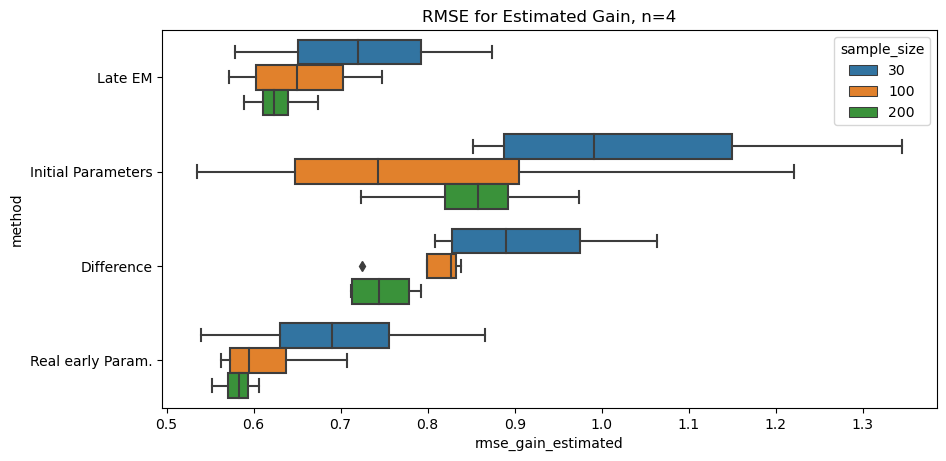

In [8]:
model_boxplot(full_Q_df, metric='rmse_gain_estimated', title="RMSE for Estimated Gain")

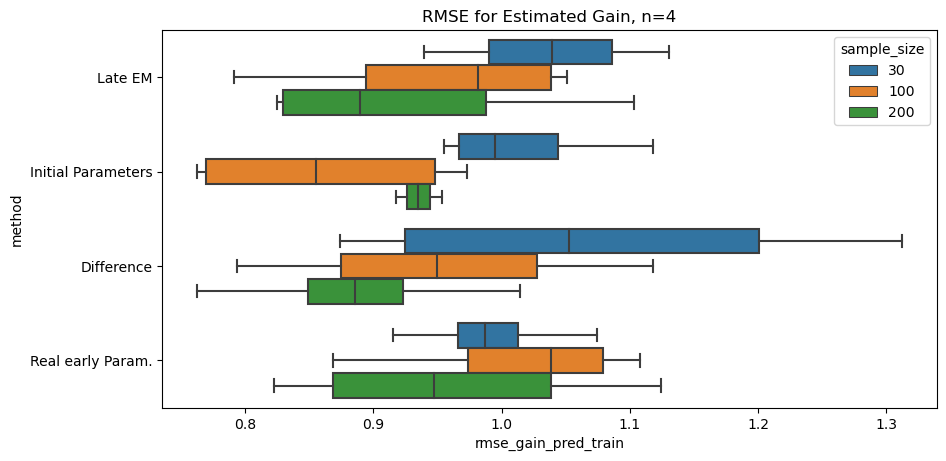

In [9]:
model_boxplot(full_Q_df, metric='rmse_gain_pred_train', title="RMSE for Estimated Gain")

### Seperated Q-Matrix

In [49]:
sep_Q_df = pd.read_csv("results/seperated_q.csv")
sep_Q_df

,latent_dimension,item_dimension,sample_size,key,method,early_runtime,late_runtime,early_steps,late_steps,early_l_optimal,...,rmse_early_A,rmse_early_delta,rmse_early_sigma,rmse_late_A,rmse_late_delta,rmse_psi,rmse_late_sigma,rmse_theta,rmse_gain_estimated,rmse_gain_pred_train
0,2,10,30,2022-11-09 14:13:59.977141,late_em,2.46,6.97,8.0,6.0,-165.55,...,0.871733,0.897408,0.230870,0.578739,0.421377,0.150137,0.111363,0.668068,0.648498,0.602380
1,2,10,30,2022-11-09 14:13:59.977141,initial,0.00,0.00,0.0,0.0,-165.68,...,0.822722,0.524366,0.353553,0.919626,0.556238,0.231157,0.353605,0.776873,0.986678,0.643375
2,2,10,30,2022-11-09 14:13:59.977141,difference,2.21,2.09,8.0,8.0,-165.82,...,0.804284,0.765525,0.269337,0.610905,0.354392,0.367587,0.275833,0.664686,0.983067,0.810406
3,2,10,30,2022-11-09 14:13:59.977141,real_early,NaN,8.16,NaN,7.0,NaN,...,NaN,NaN,NaN,0.507558,0.369690,0.185825,0.345257,0.000000,0.598543,0.713538
4,2,10,30,2022-11-09 14:13:59.977141,pure_competency,1.66,7.96,7.0,7.0,-165.73,...,0.844382,0.759816,0.000000,0.633343,0.352381,0.329273,0.587353,0.668640,0.846396,0.678724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,3,20,200,2022-11-09 17:29:08.421871,late_em,4.57,63.17,6.0,6.0,-2177.60,...,0.324554,0.261302,0.211879,0.226397,0.362822,0.421092,0.547955,0.703410,0.808644,0.865711
1321,3,20,200,2022-11-09 17:29:08.421871,initial,0.00,0.00,0.0,0.0,-2177.69,...,0.617583,0.349889,0.300489,0.918931,0.573969,0.278575,0.287937,0.771374,1.446046,0.796816
1322,3,20,200,2022-11-09 17:29:08.421871,difference,5.44,4.35,7.0,6.0,-2179.07,...,0.300354,0.263080,0.175595,0.220384,0.367540,0.258907,0.196257,0.695262,0.981375,0.862667
1323,3,20,200,2022-11-09 17:29:08.421871,real_early,NaN,68.90,NaN,6.0,NaN,...,NaN,NaN,NaN,0.160468,0.308058,0.446974,0.656306,0.000000,0.964133,1.028932


In [50]:
parameter_table_model(sep_Q_df, caption="Seperated Q-Matrix, Reference Model")

\begin{table}[H]
\centering
\caption{Seperated Q-Matrix, Reference Model, n=5}
\begin{tabular}{llrrrrrrr}
\toprule
    &                   &  $A^e$ &  $\Delta^e$ &  $\Sigma^e$ &  $A^l$ &  $\Delta^l$ &  $\Sigma^l$ &  $\Psi$ \\
\textbf{Sample size} & \textbf{Method} &        &             &             &        &             &             &         \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  1.011 &       0.683 &       0.068 &  1.310 &       1.252 &       0.359 &   0.354 \\
    & \textbf{Initial Parameters} &  0.659 &       0.451 &       0.098 &  0.896 &       0.895 &       0.391 &   0.290 \\
    & \textbf{Late EM} &  1.021 &       0.718 &       0.068 &  2.023 &       1.544 &       0.391 &   0.332 \\
    & \textbf{Pure Competency} &  0.913 &       0.750 &       0.274 &  1.691 &       1.621 &       0.618 &   0.447 \\
    & \textbf{Real early Param.} &    NaN &         NaN &         NaN &  2.150 &       1.267 &       0.391 &   0.421 \\
\cline{1-9}
\multirow{5}{*}{\te

/tmp/ipykernel_7306/150259998.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(parameter_table.to_latex(bold_rows=True, multirow=True,


$A^e$  $\Delta^e$  $\Sigma^e$  $A^l$  \
Sample size Method                                                     
30          Difference          1.011       0.683       0.068  1.310   
            Initial Parameters  0.659       0.451       0.098  0.896   
            Late EM             1.021       0.718       0.068  2.023   
            Pure Competency     0.913       0.750       0.274  1.691   
            Real early Param.     NaN         NaN         NaN  2.150   
100         Difference          0.478       0.346       0.050  0.256   
            Initial Parameters  0.847       0.325       0.094  0.916   
            Late EM             0.478       0.337       0.050  0.274   
            Pure Competency     0.509       0.347       0.369  0.324   
            Real early Param.     NaN         NaN         NaN  0.343   
200         Difference          0.349       0.230       0.020  0.265   
            Initial Parameters  1.127       0.308       0.216  0.908   
            Late EM             0.375       0.215       0.030  0.249   
            Pure Competency     0.345       0.240       0.138  0.263   
            Real early Param.     NaN         NaN         NaN  0.263   

                                $\Delta^l$  $\Sigma^l$  $\Psi$  
Sample size Method                                              
30          Difference               1.252       0.359   0.354  
            Initial Parameters       0.895       0.391   0.290  
            Late EM                  1.544       0.391   0.332  
            Pure Competency          1.621       0.618   0.447  
            Real early Param.        1.267       0.391   0.421  
100         Difference               0.488       0.201   0.225  
            Initial Parameters       0.779       0.357   0.300  
            Late EM                  0.563       0.289   0.238  
            Pure Competency          0.412       0.619   0.368  
            Real early Param.        0.514       0.379   0.348  
200         Difference               0.340       0.143   0.338  
            Initial Parameters       0.809       0.354   0.270  
            Late EM                  0.323       0.312   0.291  
            Pure Competency          0.330       0.639   0.416  
            Real early Param.        0.314       0.330   0.220

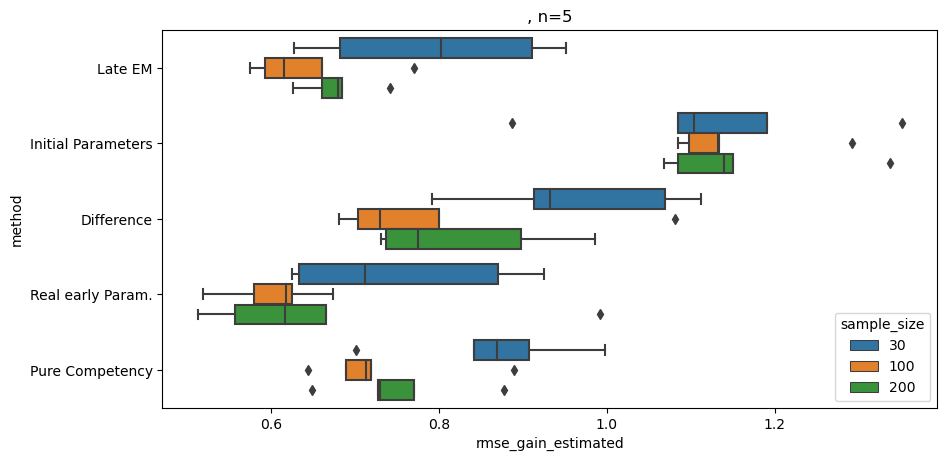

In [51]:
model_boxplot(sep_Q_df, metric='rmse_gain_estimated')

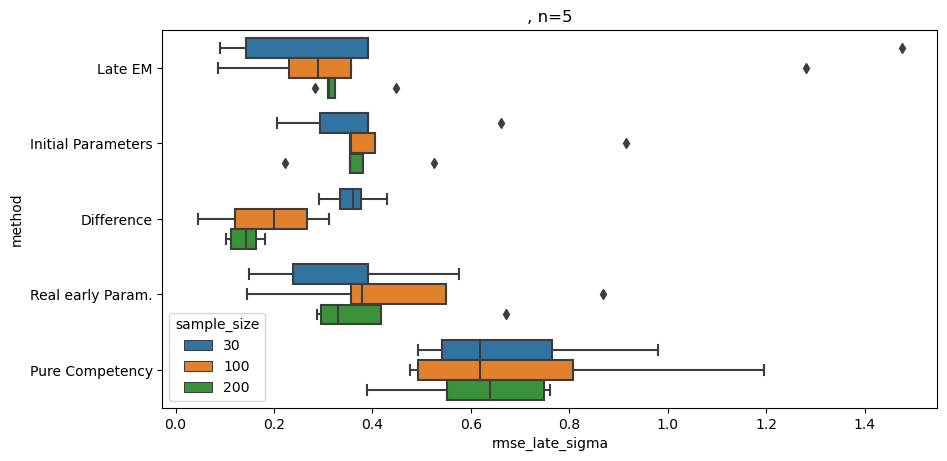

In [52]:
model_boxplot(sep_Q_df, metric='rmse_late_sigma')

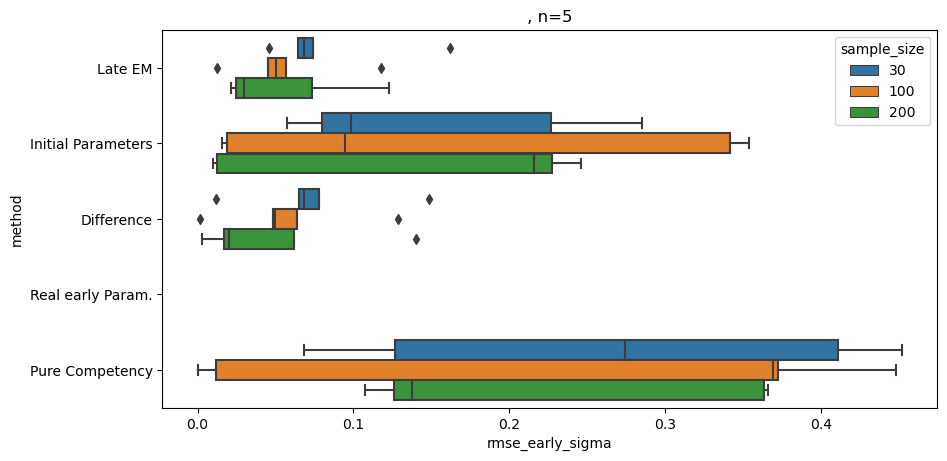

In [53]:
model_boxplot(sep_Q_df, metric='rmse_early_sigma')

### Pyramid Q-Matrix

In [54]:
pyramid_Q_df = pd.read_csv("results/pyramid_q.csv")
pyramid_Q_df

,latent_dimension,item_dimension,sample_size,key,method,early_runtime,late_runtime,early_steps,late_steps,early_l_optimal,...,rmse_early_A,rmse_early_delta,rmse_early_sigma,rmse_late_A,rmse_late_delta,rmse_psi,rmse_late_sigma,rmse_theta,rmse_gain_estimated,rmse_gain_pred_train
0,2,10,30,2022-11-09 17:35:17.900248,late_em,1.91,13.15,7.0,9.0,-165.71,...,1.596647,0.465094,0.000000,3.425927,3.166241,0.240945,0.374053,0.790489,0.739350,0.786535
1,2,10,30,2022-11-09 17:35:17.900248,initial,0.00,0.00,0.0,0.0,-166.23,...,1.629778,0.467686,0.353553,0.992341,1.115417,0.390831,0.384126,0.807575,0.961204,0.746710
2,2,10,30,2022-11-09 17:35:17.900248,difference,2.22,2.92,8.0,10.0,-165.83,...,1.710161,0.479138,0.000050,1.546724,1.558083,0.369769,0.226440,0.817012,0.928635,0.850655
3,2,10,30,2022-11-09 17:35:17.900248,real_early,NaN,7.36,NaN,6.0,NaN,...,NaN,NaN,NaN,2.518091,3.559138,0.482771,0.763990,0.000000,0.877311,0.954047
4,2,10,30,2022-11-09 17:35:17.900248,pure_competency,1.82,12.02,7.0,9.0,-165.61,...,1.614004,0.420618,0.000000,3.001575,2.919017,0.483658,0.687210,0.798692,0.899857,0.780534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3,20,200,2022-11-09 22:52:16.599546,late_em,6.35,109.75,7.0,8.0,-1875.54,...,0.919388,0.302120,0.155194,0.792254,0.813577,0.252295,0.299479,0.613301,0.725456,0.872102
296,3,20,200,2022-11-09 22:52:16.599546,initial,0.00,0.00,0.0,0.0,-1873.99,...,1.608294,0.493561,0.333753,1.434783,1.407031,0.252301,0.299499,0.759959,1.224014,0.887221
297,3,20,200,2022-11-09 22:52:16.599546,difference,7.31,7.13,8.0,8.0,-1873.42,...,0.896023,0.317678,0.142570,0.826298,0.399761,0.238742,0.138670,0.608472,0.767908,0.862114
298,3,20,200,2022-11-09 22:52:16.599546,real_early,NaN,103.18,NaN,7.0,NaN,...,NaN,NaN,NaN,0.918357,1.277033,0.419103,0.476989,0.000000,0.817196,1.019666


In [55]:
parameter_table_model(full_Q_df, caption="Pyramid-Q-Matrix, RMSE Median of Parameter Recovery")

\begin{table}[H]
\centering
\caption{Pyramid-Q-Matrix, RMSE Median of Parameter Recovery, n=3}
\begin{tabular}{llrrrrrrr}
\toprule
    &                   &  $A^e$ &  $\Delta^e$ &  $\Sigma^e$ &   $A^l$ &  $\Delta^l$ &  $\Sigma^l$ &  $\Psi$ \\
\textbf{Sample size} & \textbf{Method} &        &             &             &         &             &             &         \\
\midrule
\multirow{4}{*}{\textbf{30 }} & \textbf{Difference} &  1.550 &       1.364 &       0.139 &   7.539 &       6.564 &       0.191 &   0.292 \\
    & \textbf{Initial Parameters} &  1.695 &       0.633 &       0.118 &   1.452 &       2.010 &       0.756 &   0.450 \\
    & \textbf{Late EM} &  1.712 &       1.493 &       0.146 &  19.263 &       8.394 &       0.247 &   0.399 \\
    & \textbf{Real early Param.} &    NaN &         NaN &         NaN &  13.521 &      11.660 &       0.248 &   0.333 \\
\cline{1-9}
\multirow{4}{*}{\textbf{100}} & \textbf{Difference} &  0.650 &       0.425 &       0.151 &   0.783 &       1.038 & 

/tmp/ipykernel_7306/150259998.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(parameter_table.to_latex(bold_rows=True, multirow=True,


$A^e$  $\Delta^e$  $\Sigma^e$   $A^l$  \
Sample size Method                                                      
30          Difference          1.550       1.364       0.139   7.539   
            Initial Parameters  1.695       0.633       0.118   1.452   
            Late EM             1.712       1.493       0.146  19.263   
            Real early Param.     NaN         NaN         NaN  13.521   
100         Difference          0.650       0.425       0.151   0.783   
            Initial Parameters  1.352       0.514       0.190   1.307   
            Late EM             0.645       0.422       0.168   1.030   
            Real early Param.     NaN         NaN         NaN   1.108   
200         Difference          0.468       0.263       0.123   0.534   
            Initial Parameters  1.287       0.532       0.097   1.553   
            Late EM             0.527       0.260       0.118   0.727   
            Real early Param.     NaN         NaN         NaN   0.565   

                                $\Delta^l$  $\Sigma^l$  $\Psi$  
Sample size Method                                              
30          Difference               6.564       0.191   0.292  
            Initial Parameters       2.010       0.756   0.450  
            Late EM                  8.394       0.247   0.399  
            Real early Param.       11.660       0.248   0.333  
100         Difference               1.038       0.109   0.212  
            Initial Parameters       1.627       0.395   0.283  
            Late EM                  1.486       0.194   0.426  
            Real early Param.        1.169       0.146   0.432  
200         Difference               0.729       0.097   0.162  
            Initial Parameters       1.833       0.285   0.314  
            Late EM                  1.432       0.469   0.257  
            Real early Param.        0.959       0.399   0.259

In [56]:
single_metric_table(pyramid_Q_df, "rmse_psi", caption="RMSE for Correlations $\Psi$")

/tmp/ipykernel_7306/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


\begin{table}[H]
\centering
\caption{RMSE for Correlations $\Psi$, n=5}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{5}{*}{\textbf{30 }} & \textbf{Difference} &  0.370 &  0.456 &  0.370 &  0.272 \\
    & \textbf{Initial Parameters} &  0.279 &  0.406 &  0.276 &  0.259 \\
    & \textbf{Late EM} &  0.241 &  0.261 &  0.360 &  0.259 \\
    & \textbf{Pure Competency} &  0.398 &  0.517 &  0.357 &  0.330 \\
    & \textbf{Real early Param.} &  0.224 &  0.414 &  0.368 &  0.306 \\
\cline{1-6}
\multirow{5}{*}{\textbf{100}} & \textbf{Difference} &  0.233 &  0.315 &  0.349 &  0.328 \\
    & \textbf{Initial Parameters} &  0.300 &  0.344 &  0.288 &  0.300 \\
    & \textbf{Late EM} &  0.332 &  0.363 &  0.253 &  0.318 \\
    & \textbf{Pure Competency} &  0.400 &  0.39

latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.370  0.456  0.370  0.272
            Initial Parameters  0.279  0.406  0.276  0.259
            Late EM             0.241  0.261  0.360  0.259
            Pure Competency     0.398  0.517  0.357  0.330
            Real early Param.   0.224  0.414  0.368  0.306
100         Difference          0.233  0.315  0.349  0.328
            Initial Parameters  0.300  0.344  0.288  0.300
            Late EM             0.332  0.363  0.253  0.318
            Pure Competency     0.400  0.397  0.397  0.379
            Real early Param.   0.290  0.344  0.407  0.303
200         Difference          0.307  0.243  0.250  0.270
            Initial Parameters  0.208  0.290  0.230  0.250
            Late EM             0.202  0.299  0.362  0.264
            Pure Competency     0.370  0.439  0.320  0.335
            Real early Param.   0.300  0.310  0.317  0.417

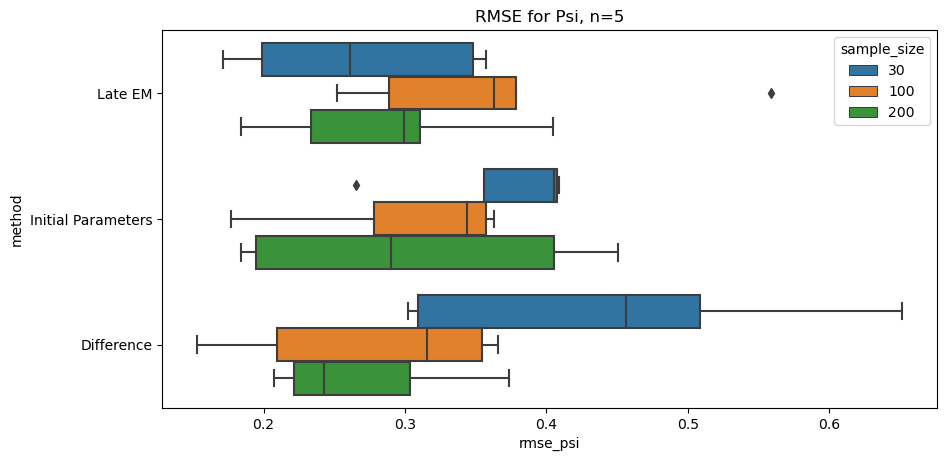

In [57]:
model_boxplot(pyramid_Q_df, metric="rmse_psi", methods=["late_em", "initial", "difference"], title="RMSE for Psi")

## Experiment 2: Prediction of Competency Gain

In [58]:
single_metric_table(full_Q_df, "rmse_theta", caption="Median RMSE for the estimation of $\\theta$")

\begin{table}[H]
\centering
\caption{Median RMSE for the estimation of $\theta$, n=3}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{4}{*}{\textbf{30 }} & \textbf{Difference} &  0.662 &  0.471 &  0.617 &  0.525 \\
    & \textbf{Initial Parameters} &  0.617 &  0.465 &  0.569 &  0.523 \\
    & \textbf{Late EM} &  0.662 &  0.472 &  0.598 &  0.527 \\
    & \textbf{Real early Param.} &  0.000 &  0.000 &  0.000 &  0.000 \\
\cline{1-6}
\multirow{4}{*}{\textbf{100}} & \textbf{Difference} &  0.542 &  0.464 &  0.638 &  0.468 \\
    & \textbf{Initial Parameters} &  0.564 &  0.513 &  0.633 &  0.526 \\
    & \textbf{Late EM} &  0.537 &  0.468 &  0.635 &  0.475 \\
    & \textbf{Real early Param.} &  0.000 &  0.000 &  0.000 &  0.000 \\
\cline{1-6}
\multirow{4}{*}{\te

/tmp/ipykernel_7306/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.662  0.471  0.617  0.525
            Initial Parameters  0.617  0.465  0.569  0.523
            Late EM             0.662  0.472  0.598  0.527
            Real early Param.   0.000  0.000  0.000  0.000
100         Difference          0.542  0.464  0.638  0.468
            Initial Parameters  0.564  0.513  0.633  0.526
            Late EM             0.537  0.468  0.635  0.475
            Real early Param.   0.000  0.000  0.000  0.000
200         Difference          0.561  0.443  0.610  0.505
            Initial Parameters  0.620  0.509  0.640  0.534
            Late EM             0.561  0.450  0.609  0.505
            Real early Param.   0.000  0.000  0.000  0.000

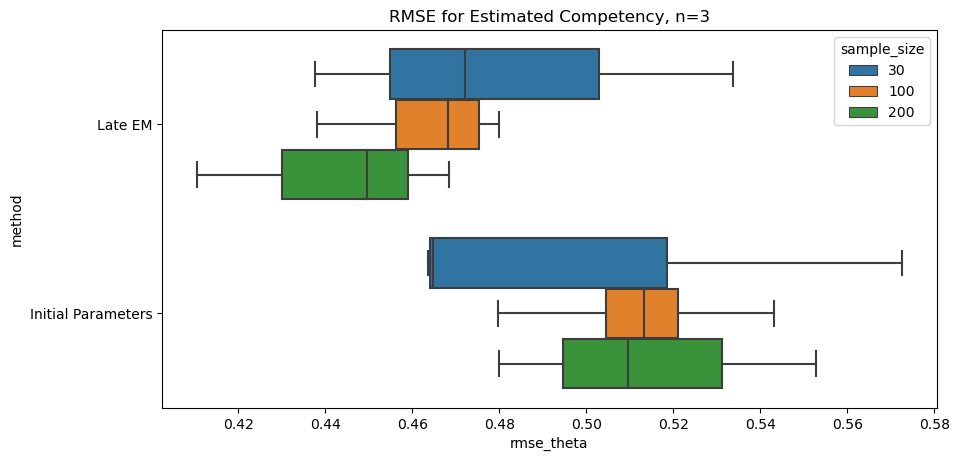

In [59]:
model_boxplot(full_Q_df, metric="rmse_theta", methods=["late_em", "initial"], title="RMSE for Estimated Competency")

In [60]:
single_metric_table(full_Q_df, "rmse_gain_estimated", caption="Median RMSE for Competency Gain Estimation")

\begin{table}[H]
\centering
\caption{Median RMSE for Competency Gain Estimation, n=3}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{4}{*}{\textbf{30 }} & \textbf{Difference} &  0.853 &  0.834 &  0.948 &  0.824 \\
    & \textbf{Initial Parameters} &  0.770 &  1.084 &  0.981 &  1.176 \\
    & \textbf{Late EM} &  0.708 &  0.675 &  0.856 &  0.773 \\
    & \textbf{Real early Param.} &  0.743 &  0.660 &  0.923 &  0.667 \\
\cline{1-6}
\multirow{4}{*}{\textbf{100}} & \textbf{Difference} &  0.907 &  0.827 &  0.907 &  0.863 \\
    & \textbf{Initial Parameters} &  0.800 &  0.742 &  0.927 &  1.113 \\
    & \textbf{Late EM} &  0.903 &  0.650 &  0.874 &  0.649 \\
    & \textbf{Real early Param.} &  0.849 &  0.595 &  0.843 &  0.626 \\
\cline{1-6}
\multirow{4}{*}{\te

/tmp/ipykernel_7306/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          0.853  0.834  0.948  0.824
            Initial Parameters  0.770  1.084  0.981  1.176
            Late EM             0.708  0.675  0.856  0.773
            Real early Param.   0.743  0.660  0.923  0.667
100         Difference          0.907  0.827  0.907  0.863
            Initial Parameters  0.800  0.742  0.927  1.113
            Late EM             0.903  0.650  0.874  0.649
            Real early Param.   0.849  0.595  0.843  0.626
200         Difference          0.898  0.714  0.875  0.893
            Initial Parameters  0.784  0.865  0.934  0.887
            Late EM             0.796  0.618  0.829  0.707
            Real early Param.   0.821  0.577  0.830  0.676

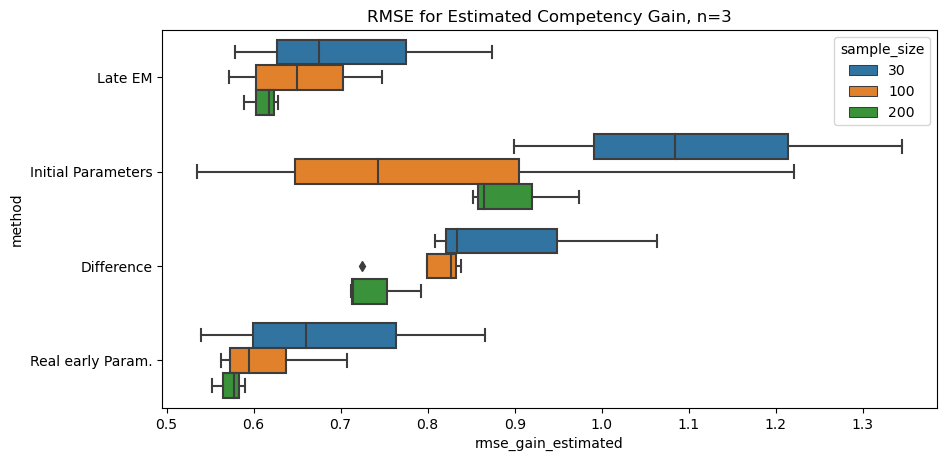

In [61]:
model_boxplot(full_Q_df, metric="rmse_gain_estimated", title="RMSE for Estimated Competency Gain")

In [62]:
single_metric_table(full_Q_df, "rmse_gain_pred_train", caption="Median RMSE for Competency Gain Prediction")

\begin{table}[H]
\centering
\caption{Median RMSE for Competency Gain Prediction, n=3}
\begin{tabular}{llrrrr}
\toprule
    & \textbf{latent\_dimension} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{3} \\
    & \textbf{item\_dimension} &     10 &     20 &     10 &     20 \\
\textbf{sample\_size} & \textbf{method} &        &        &        &        \\
\midrule
\multirow{4}{*}{\textbf{30 }} & \textbf{Difference} &  1.000 &  0.942 &  1.106 &  1.115 \\
    & \textbf{Initial Parameters} &  0.950 &  0.971 &  1.012 &  0.971 \\
    & \textbf{Late EM} &  0.975 &  1.007 &  1.012 &  0.998 \\
    & \textbf{Real early Param.} &  0.888 &  0.992 &  1.053 &  0.963 \\
\cline{1-6}
\multirow{4}{*}{\textbf{100}} & \textbf{Difference} &  1.075 &  0.950 &  1.192 &  1.195 \\
    & \textbf{Initial Parameters} &  1.043 &  0.855 &  1.116 &  1.022 \\
    & \textbf{Late EM} &  1.167 &  0.982 &  1.151 &  1.020 \\
    & \textbf{Real early Param.} &  1.225 &  1.039 &  1.199 &  1.028 \\
\cline{1-6}
\multirow{4}{*}{\te

/tmp/ipykernel_7306/1552858579.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True, multirow=True,


latent_dimension                    2             3       
item_dimension                     10     20     10     20
sample_size method                                        
30          Difference          1.000  0.942  1.106  1.115
            Initial Parameters  0.950  0.971  1.012  0.971
            Late EM             0.975  1.007  1.012  0.998
            Real early Param.   0.888  0.992  1.053  0.963
100         Difference          1.075  0.950  1.192  1.195
            Initial Parameters  1.043  0.855  1.116  1.022
            Late EM             1.167  0.982  1.151  1.020
            Real early Param.   1.225  1.039  1.199  1.028
200         Difference          0.988  0.877  1.114  1.075
            Initial Parameters  0.944  0.941  1.023  1.036
            Late EM             1.001  0.830  1.038  1.088
            Real early Param.   1.186  0.884  1.091  1.054

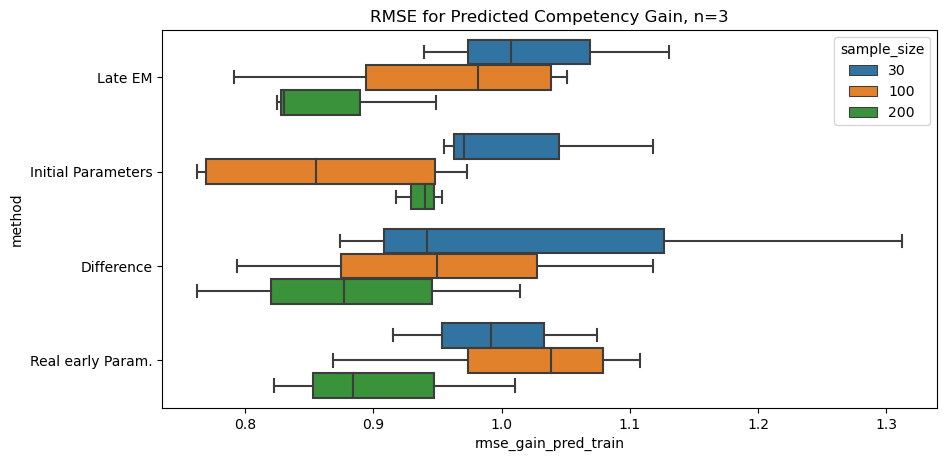

In [63]:
model_boxplot(full_Q_df, metric="rmse_gain_pred_train", title="RMSE for Predicted Competency Gain")

### CSEDM Data
base: uirt_lfa_model_csedm_final.ipynb

In [64]:
import pandas as pd
import numpy as np
from ProgSnap2 import ProgSnap2Dataset
from ProgSnap2 import PS2
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import time
import os
from os import path
import sys
sys.path.append(os.path.realpath("./models"))
sys.path.append(os.path.realpath("./em_algorithm"))
# Custom modules, import violates pep8, so we have to declare an exeption
if True:  # noqa: E402
    from mirt_2pl import mirt_2pl
    from mirt_2pl_gain import mirt_2pl_gain
    from e_step_mirt_2pl import e_step_ga_mml
    from e_step_mirt_2pl_gain import e_step_ga_mml_gain
    from m_step_mirt_2pl import m_step_ga_mml
    from m_step_mirt_2pl_gain import m_step_ga_mml_gain
    from em_algorithm import em_algo

In [65]:
semester = 'F19'
BASE_PATH = os.path.join('C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset', 'F19_Release_Train_06-28-21')
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')

In [66]:
#Dataset for early Problem Performance (Aggregated from Event-Data)
early = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
early["alt_Label"] = early.apply(lambda x: 1 if (x["CorrectEventually"] and x["Attempts"] <= 3) else 0, axis=1)
early

late = pd.read_csv(os.path.join(TRAIN_PATH, 'late.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset/F19_Release_Train_06-28-21/Train/early.csv'

In [ ]:
from sklearn.impute import KNNImputer

#Obtain Matrix of Response-vectors
U = pd.crosstab(index = early["SubjectID"], 
            columns=[early["AssignmentID"], early["ProblemID"]], 
            values=early["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
imputer = KNNImputer(n_neighbors=4)
U = imputer.fit_transform(U).round()
U = pd.DataFrame(U)

#Obtain Matrix of Response-vectors
V = pd.crosstab(index = late["SubjectID"], 
            columns=[late["AssignmentID"], late["ProblemID"]], 
            values=late["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
#late_U = late_U.dropna()

imputer = KNNImputer(n_neighbors=4)
V = imputer.fit_transform(V).round()
V = pd.DataFrame(V)


In [ ]:
#Source: https://docs.google.com/spreadsheets/d/1-APxPAVP3PylM0fskzDNgpalj1DTuMqDLkgBC5QxJdg/edit#gid=0
item_skill_df = pd.read_csv("CSEDM Challenge/item_skill_relation.csv")
item_skill_df.columns

Index(['AssignmentID', 'ProblemID', 'Requirement', 'If/Else', 'NestedIf',
       'While', 'For', 'NestedFor', 'Math+-*/', 'Math%', 'LogicAndNotOr',
       'LogicCompareNum', 'LogicBoolean', 'StringFormat', 'StringConcat',
       'StringIndex', 'StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex',
       'DefFunction'],
      dtype='object')

In [ ]:
logic_skills = ['If/Else', 'NestedIf', 'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean']
string_skills = ['StringFormat', 'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual']
iter_skills = ['While', 'For', 'NestedFor', 'ArrayIndex']

logic_exercises = (np.sum(item_skill_df[logic_skills], axis=1) > 0)
string_exersises = (np.sum(item_skill_df[string_skills], axis=1) > 0)
iter_exercises = (np.sum(item_skill_df[iter_skills], axis=1) > 0)

full_Q = np.stack((logic_exercises, iter_exercises), axis=1)
early_Q = full_Q[0:30,:]
late_Q = full_Q[30:50, :]

In [ ]:
# Fit early Model
early_model = mirt_2pl(latent_dimension=2, item_dimension=U.shape[1], Q=early_Q)
early_model.initialize_from_responses(response_data=U)
e_step = e_step_ga_mml(model=early_model)
m_step = m_step_ga_mml(
    early_model, sigma_constraint="early_constraint")
em = em_algo(e_step=e_step, m_step=m_step, model=early_model)


start_time = time.time()
em.fit([U.reset_index(drop=True)], max_iter=30,
        stop_threshold=0.001, person_method="BFGS")
run_time = (time.time() - start_time)
theta_hat = early_model.predict_competency(U)
estimated_early_item_parameters = em.model.item_parameters
estimated_early_person_parameters = em.model.person_parameters

EM Iteration 2


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 300
Step: 2: current parameter_diff: 7.681067664979868, current marginal loglikelihood: -5625.47600622357
EM Iteration 3


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 300
Step: 3: current parameter_diff: 5.220576374504292, current marginal loglikelihood: -5596.043829255184
EM Iteration 4
Current Monte Carlo Sample size: 324
Step: 4: current parameter_diff: 4.032774272562575, current marginal loglikelihood: -5584.724196494348
EM Iteration 5
Current Monte Carlo Sample size: 349
Step: 5: current parameter_diff: 1.9814710803755204, current marginal loglikelihood: -5582.910259791057
EM Iteration 6
Current Monte Carlo Sample size: 349
Step: 6: current parameter_diff: 1.2320845095971242, current marginal loglikelihood: -5576.034753870593
EM Iteration 7
Current Monte Carlo Sample size: 349
Step: 7: current parameter_diff: 1.0769566680420153, current marginal loglikelihood: -5577.794116313211
EM Iteration 8
Current Monte Carlo Sample size: 376
Step: 8: current parameter_diff: 0.7189341032165424, current marginal loglikelihood: -5580.823244450756
EM Iteration 9
Current Monte Carlo Sample size: 406
Step: 9: current parameter_di

In [ ]:
# Estimate the Late Variance


In [ ]:
#Fit late Model
# Initialize Model
late_model = mirt_2pl_gain(item_dimension=20, latent_dimension=2, mu=1,
                            early_sigma=estimated_early_person_parameters["covariance"],
                            Q=late_Q)
# TODO: Check if theta_hat can be used
late_model.initialize_from_responses(
    late_response_data=V, early_response_data=U,
    logit=True, sigma=False)
late_initial_parameters = late_model.get_parameters()
e_step = e_step_ga_mml_gain(
    model=late_model)
m_step = m_step_ga_mml_gain(
    late_model, sigma_constraint="early_constraint")
em = em_algo(e_step=e_step, m_step=m_step, model=late_model)

# Fit late model
start_time = time.time()
em.fit([V, pd.DataFrame(theta_hat)], max_iter=30,
        stop_threshold=0.01, person_method="BFGS")
run_time = (time.time() - start_time)
s_hat = late_model.predict_gain(
    V, pd.DataFrame(theta_hat))

s_pred_train = late_model.predict_gain(
    theta=pd.DataFrame(theta_hat))


EM Iteration 2


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 300
Step: 2: current parameter_diff: 15.316731053708994, current marginal loglikelihood: -4388.1934722085225
EM Iteration 3


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 300
Step: 3: current parameter_diff: 15.546695318428252, current marginal loglikelihood: -4308.945473532111
EM Iteration 4


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 324
Step: 4: current parameter_diff: 12.659906171045819, current marginal loglikelihood: -4238.584898057168
EM Iteration 5


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 349
Step: 5: current parameter_diff: 10.176842909329284, current marginal loglikelihood: -4221.751283602607
EM Iteration 6


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 349
Step: 6: current parameter_diff: 7.036951912282921, current marginal loglikelihood: -4248.609813055852
EM Iteration 7


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 376
Step: 7: current parameter_diff: 9.013442810859413, current marginal loglikelihood: -4204.158583259397
EM Iteration 8


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 406
Step: 8: current parameter_diff: 5.089076181803777, current marginal loglikelihood: -4190.928064809696
EM Iteration 9


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 438
Step: 9: current parameter_diff: 6.482547519455441, current marginal loglikelihood: -4200.844389386189
EM Iteration 10


c:\Users\Jesper\anaconda3\lib\site-packages\scipy\stats\_qmc.py:2039: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  samples = self.engine.random(n)


Current Monte Carlo Sample size: 473
Step: 10: current parameter_diff: 8.45047131027558, current marginal loglikelihood: -4193.014876297612


In [ ]:
U.shape

(367, 30)

In [46]:
V.shape

(367, 20)